Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 1 ]
Baris 1 :
   - Membership Klaster 1 : 0.333331373516959
   - Membership Klaster 2 : 0.33333668432426866
   - Membership Klaster 3 : 0.3333319421587722
Baris 2 :
   - Membership Klaster 1 : 0.3333294154127454
   - Membership Klaster 2 : 0.3333400348668616
   - Membership Klaster 3 : 0.33333054972039294
Baris 3 :
   - Membership Klaster 1 : 0.3333294141220676
   - Membership Klaster 2 : 0.3333400348918256
   - Membership Klaster 3 : 0.33333055098610676
Baris 4 :
   - Membership Klaster 1 : 0.33332680169637335
   - Membership Klaster 2 : 0.3333445028111269
   - Membership Klaster 3 : 0.3333286954924998
Baris 5 :
   - Membership Klaster 1 : 0.33333137386491346
   - Membership Klaster 2 : 0.3333366841074545
   - Membership Klaster 3 : 0.33333194202763206
Baris 6 :
   - Membership Klaster 1 : 0.33332354056038827
   - Membership Klaster 2 : 0.3333500879496618
   - Membership Klaster 3 : 0.3333263714899499
Baris 7 :
   - Membership Klaster 1

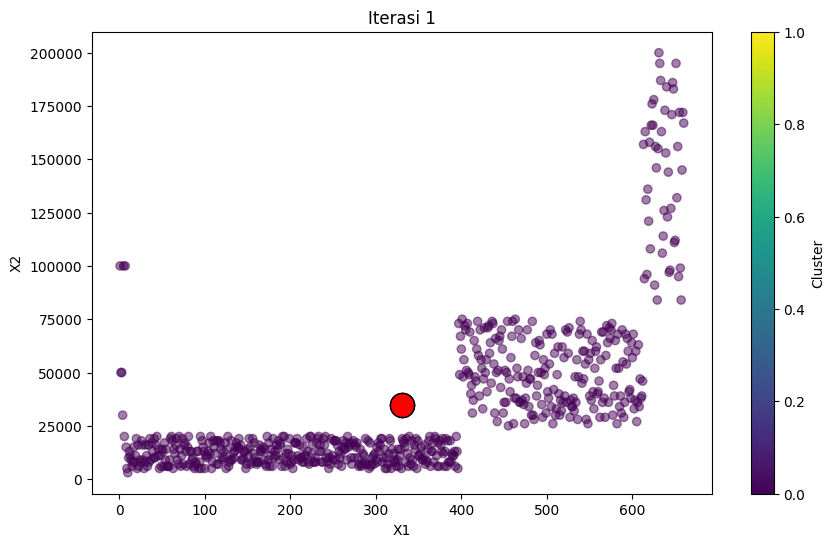

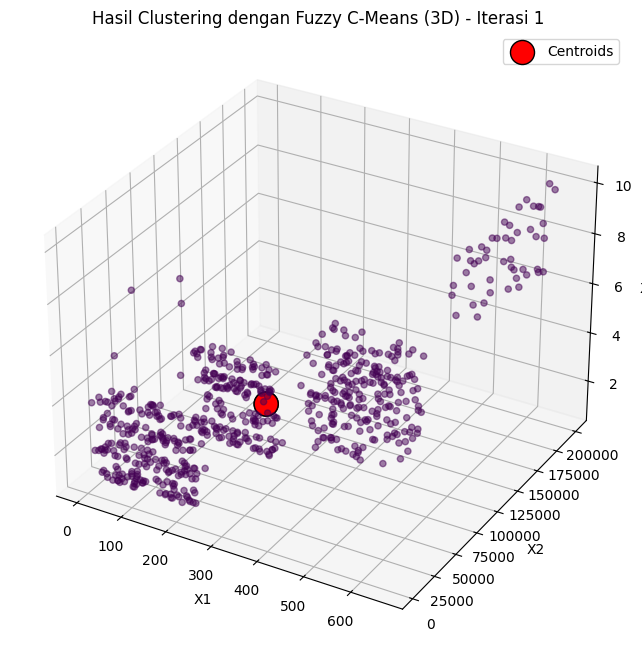

Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 2 ]
Baris 1 :
   - Membership Klaster 1 : 0.33334820875661436
   - Membership Klaster 2 : 0.33330728173251506
   - Membership Klaster 3 : 0.3333445095108707
Baris 2 :
   - Membership Klaster 1 : 0.3333963891082102
   - Membership Klaster 2 : 0.33322290638658336
   - Membership Klaster 3 : 0.3333807045052064
Baris 3 :
   - Membership Klaster 1 : 0.3333963893260716
   - Membership Klaster 2 : 0.3332229060056226
   - Membership Klaster 3 : 0.3333807046683058
Baris 4 :
   - Membership Klaster 1 : 0.3331215031769359
   - Membership Klaster 2 : 0.3337043750869009
   - Membership Klaster 3 : 0.3331741217361632
Baris 5 :
   - Membership Klaster 1 : 0.3333482087700209
   - Membership Klaster 2 : 0.3333072817091366
   - Membership Klaster 3 : 0.3333445095208425
Baris 6 :
   - Membership Klaster 1 : 0.33326657122307196
   - Membership Klaster 2 : 0.3334502618293921
   - Membership Klaster 3 : 0.333283166947536
Baris 7 :
   - Membership Klaster 1 : 

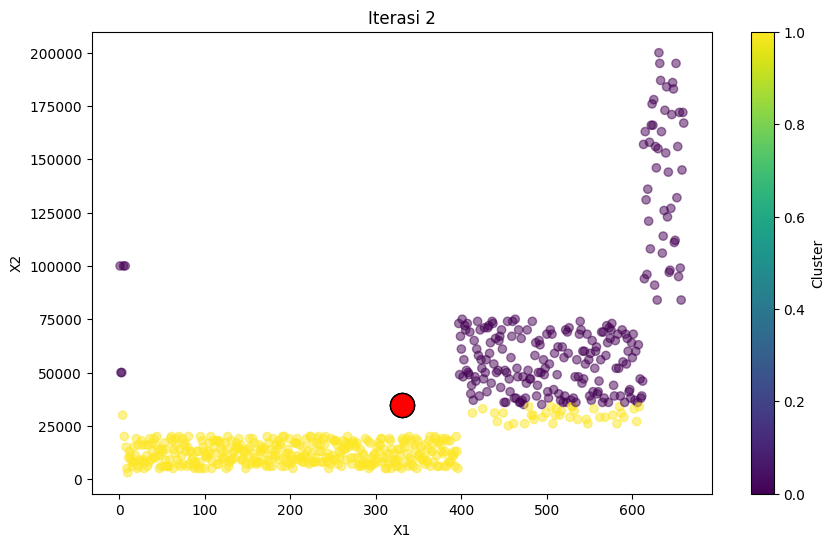

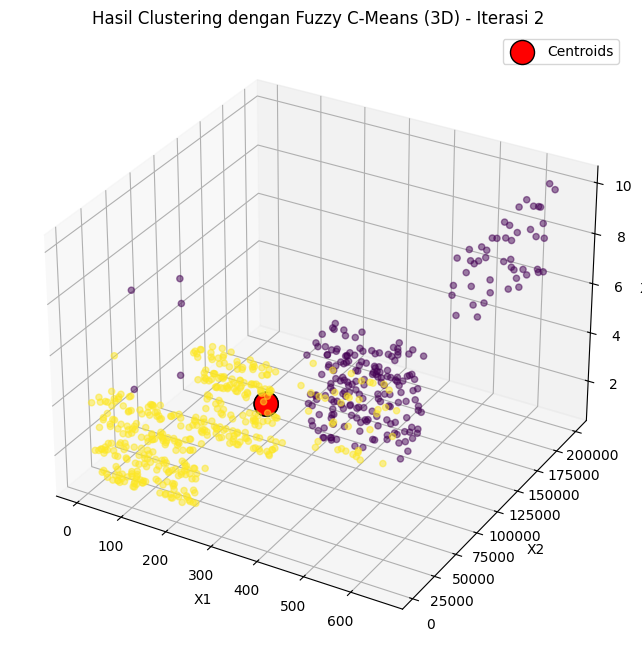

Hasil Perhitungan Matriks Keanggotaan:
[ Iterasi 3 ]
Baris 1 :
   - Membership Klaster 1 : 0.33339270590457165
   - Membership Klaster 2 : 0.3332293576284076
   - Membership Klaster 3 : 0.33337793646702074
Baris 2 :
   - Membership Klaster 1 : 0.33358496164884865
   - Membership Klaster 2 : 0.3328927334857905
   - Membership Klaster 3 : 0.3335223048653609
Baris 3 :
   - Membership Klaster 1 : 0.3335849625323334
   - Membership Klaster 2 : 0.3328927319395578
   - Membership Klaster 3 : 0.3335223055281088
Baris 4 :
   - Membership Klaster 1 : 0.3324871026628808
   - Membership Klaster 2 : 0.33481626724096797
   - Membership Klaster 3 : 0.3326966300961513
Baris 5 :
   - Membership Klaster 1 : 0.3333927059605819
   - Membership Klaster 2 : 0.33322935753039473
   - Membership Klaster 3 : 0.3333779365090234
Baris 6 :
   - Membership Klaster 1 : 0.33306677933963913
   - Membership Klaster 2 : 0.3338002450878073
   - Membership Klaster 3 : 0.3331329755725535
Baris 7 :
   - Membership Klaster 1

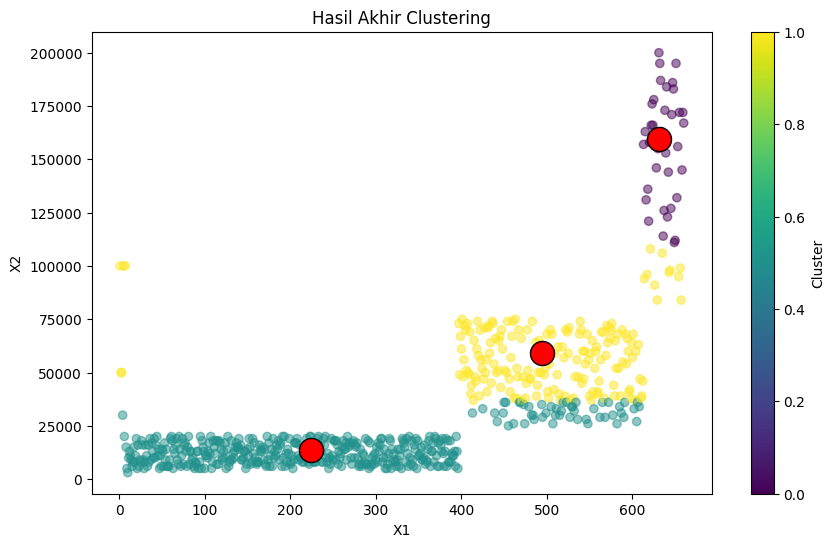

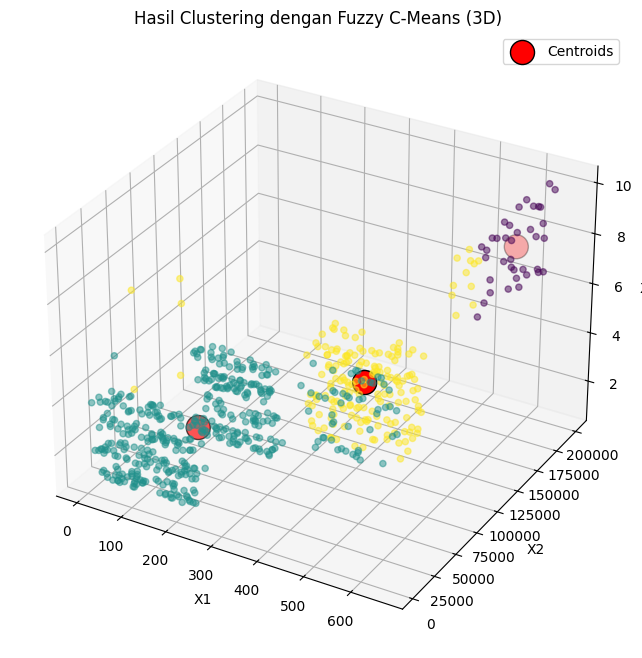

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data from URL
url = "https://github.com/nendynailula/fuzzy-cmeans/blob/main/Credit%20Card%20Customer%20Data.csv?raw=true"
df = pd.read_csv(url)

# Menghilangkan kolom Customer_ID karena tidak diperlukan untuk clustering
data = df.drop('Customer Key', axis=1).values

# Fuzzy C-Means Algorithm
def fuzzy_cmeans(data, num_clusters, fuzziness=2, max_iter=100, error=1e-6):
    samples = data.shape[0]
    features = data.shape[1]
    cluster_centers = np.random.rand(num_clusters, features)
    
    # Iterasi
    for iter in range(max_iter):
        # Hitung matriks keanggotaan
        distances = np.linalg.norm(data[:, np.newaxis, :] - cluster_centers, axis=2)
        membership_mat = np.zeros((len(data), num_clusters))
        for i in range(samples):
            for j in range(num_clusters):
                membership_mat[i, j] = 1 / sum((distances[i, j] / np.linalg.norm(data[i] - cluster_centers[k])) ** (2 / (fuzziness - 1)) for k in range(num_clusters))

        # Perbarui centroid
        cluster_centers_old = cluster_centers.copy()
        for j in range(num_clusters):
            numerator = sum((membership_mat[i, j] ** fuzziness) * data[i] for i in range(len(data)))
            denominator = sum(membership_mat[i, j] ** fuzziness for i in range(len(data)))
            cluster_centers[j] = numerator / denominator.astype(float)  # Konversi ke float


        # Tampilkan hasil perhitungan matriks keanggotaan
        print("Hasil Perhitungan Matriks Keanggotaan:")
        print("[ Iterasi", iter+1, "]")
        for i in range(len(data)):
            print("Baris", i+1, ":")
            for j in range(num_clusters):
                print("   - Membership Klaster", j+1, ":", membership_mat[i, j])

        # Tampilkan hasil perbaruan centroid
        print("\nHasil Perbaruan Centroid:")
        for j in range(num_clusters):
            print("Centroid", j+1, ":", cluster_centers[j])

        # Cetak hasil clustering dan plot pada iterasi pertama dan kedua
        if iter == 0 or iter == 1:
            cluster_membership = membership_mat.argmax(axis=1)
            plt.figure(figsize=(10, 6))
            plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
            plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=300, c='red', edgecolor='k')
            plt.title('Iterasi {}'.format(iter+1))
            plt.xlabel('X1')
            plt.ylabel('X2')
            plt.colorbar(label='Cluster')
            plt.show()
        # Plot 3D untuk iterasi 1 dan 2
        if iter == 0 or iter == 1:
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_membership, cmap='viridis', alpha=0.5)
            ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='o', s=300, c='red', edgecolor='k', label='Centroids')
            ax.set_title('Hasil Clustering dengan Fuzzy C-Means (3D) - Iterasi {}'.format(iter+1))
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('X3')
            ax.legend()
            plt.show()
        # Cek konvergensi
        if np.linalg.norm(cluster_centers - cluster_centers_old) < error:
            break
    
    return cluster_centers, membership_mat

# Menentukan jumlah klaster dan nilai fuzziness
num_clusters = 3
fuzziness = 2

# Menjalankan algoritma Fuzzy C-Means
centroids, membership = fuzzy_cmeans(data, num_clusters, fuzziness)

# Plot hasil akhir
cluster_membership = membership.argmax(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='red', edgecolor='k')
plt.title('Hasil Akhir Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Cluster')
plt.show()

# Plot 3D hasil clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_membership, cmap='viridis', alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=300, c='red', edgecolor='k', label='Centroids')
ax.set_title('Hasil Clustering dengan Fuzzy C-Means (3D)')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()